## Merge the spatially aggregated 1-Dimensional and 2-Dimensional datasets

The WRF-Hydro modeling application outputs should have been aggregated to HUC12s. There were two notebooks that performed this opertation, depending on dimension of model output variables. This notebook merges the 1D and 2D datasets together.

In [1]:
import time
import numpy as np
import xarray as xr

tic = time.time()

In [2]:
# Input files
#Paths for 2D and 1D aggregated files
in_file1 = r'/caldera/hovenweep/projects/usgs/water/impd/hytest/working/niwaa_wrfhydro_monthly_huc12_aggregations/agg_out/CONUS_HUC12_WB_2D_19791001_20220930_2.nc'
in_file2 = r'/caldera/hovenweep/projects/usgs/water/impd/hytest/working/niwaa_wrfhydro_monthly_huc12_aggregations/1D_agg/CONUS_HUC12_WB_1D_19791001_20220930.nc'

# Output file
out_file = r'/caldera/hovenweep/projects/usgs/water/impd/hytest/working/niwaa_wrfhydro_monthly_huc12_aggregations/merge_out/CONUS_HUC12_WB_combined_19791001_20220930.nc'

# Name the zone coordinate that contains the HUC12 IDs
zone_name = 'WBDHU12'

# Name the time coordinate
time_coord = 'time'

In [3]:
ds1 = xr.open_dataset(in_file1)
ds2 = xr.open_dataset(in_file2)

In [4]:
ds1

<xarray.Dataset> Size: 89MB
Dimensions:                    (WBDHU12: 86604, time: 12)
Coordinates:
  * WBDHU12                    (WBDHU12) int64 693kB 10100020101 ... 18100204...
  * time                       (time) datetime64[ns] 96B 2011-10-01 ... 2012-...
Data variables: (12/17)
    total_gridded_area         (WBDHU12) float64 693kB ...
    Precip                     (WBDHU12, time) float32 4MB ...
    landmask                   (WBDHU12) float64 693kB ...
    deltaACCET                 (WBDHU12, time) float64 8MB ...
    deltaACSNOW                (WBDHU12, time) float64 8MB ...
    deltaSNEQV                 (WBDHU12, time) float32 4MB ...
    ...                         ...
    avgSOILM_depthmean         (WBDHU12, time) float32 4MB ...
    avgSOILM_wltadj_depthmean  (WBDHU12, time) float32 4MB ...
    avgSOILSAT                 (WBDHU12, time) float32 4MB ...
    avgSOILSAT_wltadj_top1     (WBDHU12, time) float32 4MB ...
    totPRECIP                  (WBDHU12, time) float32 4MB ...
    avgT2D                     (WBDHU12, time) float64 8MB ...
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Landmask : 1=land, 0=water
    sr_x:         1
    sr_y:         1
    stagger:      M

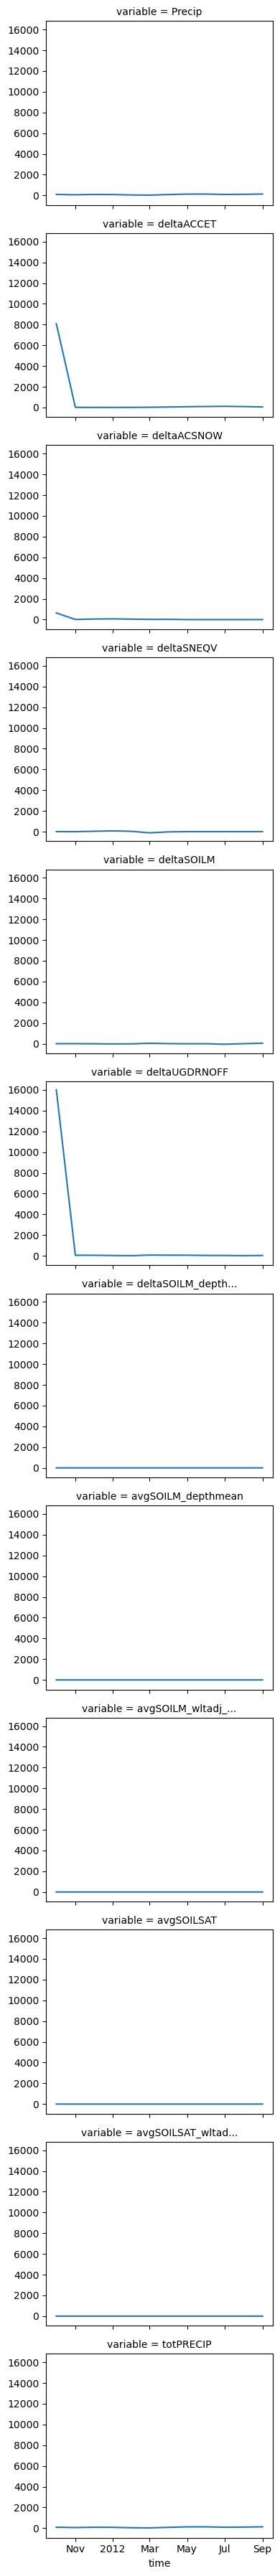

In [5]:
# Plot all variables to see ranges of values
vars_to_plot = [variable for variable in ds1.data_vars if variable not in ['avgT2D', 'avgSOILM', 'avgSNEQV', 'total_gridded_area', 'landmask']] 
ds1[vars_to_plot].isel({zone_name:2}).to_array().plot(row='variable')

In [6]:
ds2

<xarray.Dataset> Size: 141MB
Dimensions:           (time: 35, WBDHU12: 83274)
Coordinates:
  * WBDHU12           (WBDHU12) float64 666kB 1.01e+10 1.01e+10 ... 1.81e+11
  * time              (time) datetime64[ns] 280B 2011-01-01 ... 2013-11-01
Data variables:
    totOutflow        (time, WBDHU12) float64 23MB ...
    Area_sqkm         (WBDHU12) float64 666kB ...
    totInflow         (time, WBDHU12) float64 23MB ...
    bucket_depth      (time, WBDHU12) float64 23MB ...
    totqBucket        (time, WBDHU12) float64 23MB ...
    totqSfcLatRunoff  (time, WBDHU12) float64 23MB ...
    totStreamflow     (time, WBDHU12) float64 23MB ...

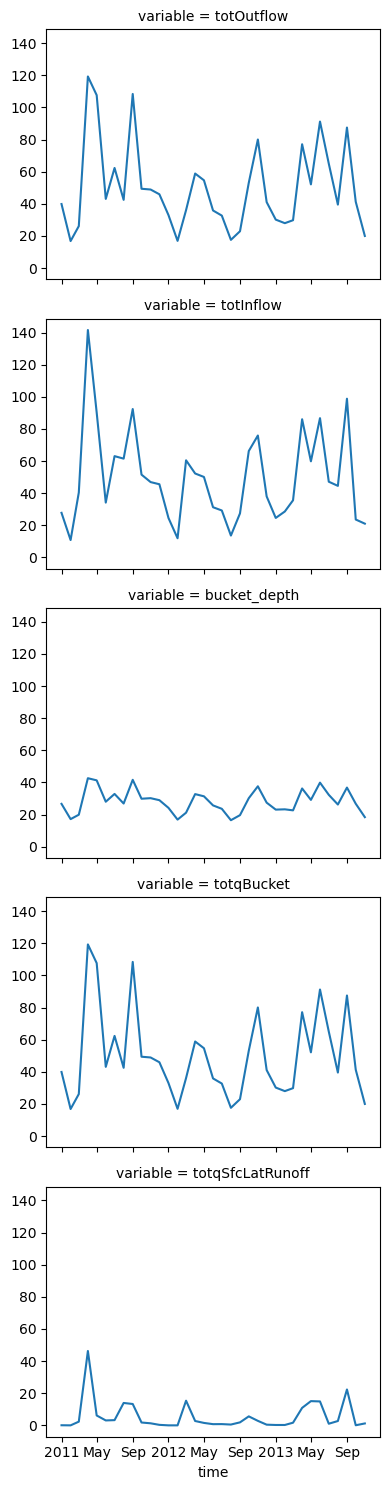

In [7]:
# Plot all variables to see ranges of values
vars_to_plot = [variable for variable in ds2.data_vars if variable not in ['Area_sqkm', 'totStreamflow']] 
ds2[vars_to_plot].isel({zone_name:2}).to_array().plot(row='variable')

In [8]:
# Find values in ds2 not in ds1
import numpy as np
vals_1D_only = ds2[zone_name][~np.in1d(ds2[zone_name], ds1[zone_name])]
print('There are {0} values in ds2 that are not in ds1.'.format(vals_1D_only.shape[0]))
      
vals_2D_only = ds1[zone_name][~np.in1d(ds1[zone_name], ds2[zone_name])]
print('There are {0} values in ds1 that are not in ds2.'.format(vals_2D_only.shape[0]))

There are 13 values in ds2 that are not in ds1.
There are 3343 values in ds1 that are not in ds2.


In [9]:
ds_out = xr.merge([ds1, ds2])
ds_out

<xarray.Dataset> Size: 403MB
Dimensions:                    (WBDHU12: 86617, time: 35)
Coordinates:
  * WBDHU12                    (WBDHU12) float64 693kB 1.01e+10 ... 1.81e+11
  * time                       (time) datetime64[ns] 280B 2011-01-01 ... 2013...
Data variables: (12/24)
    total_gridded_area         (WBDHU12) float64 693kB 64.0 75.0 ... 72.0 58.0
    Precip                     (WBDHU12, time) float32 12MB nan nan ... nan nan
    landmask                   (WBDHU12) float64 693kB 0.9412 1.0 ... 0.06298
    deltaACCET                 (WBDHU12, time) float64 24MB nan nan ... nan nan
    deltaACSNOW                (WBDHU12, time) float64 24MB nan nan ... nan nan
    deltaSNEQV                 (WBDHU12, time) float32 12MB nan nan ... nan nan
    ...                         ...
    Area_sqkm                  (WBDHU12) float64 693kB 74.25 81.73 ... 941.5
    totInflow                  (time, WBDHU12) float64 24MB 21.16 ... 0.02747
    bucket_depth               (time, WBDHU12) float64 24MB 22.46 ... 0.8456
    totqBucket                 (time, WBDHU12) float64 24MB 30.68 ... 0.04509
    totqSfcLatRunoff           (time, WBDHU12) float64 24MB 0.3658 ... 6.764e-05
    totStreamflow              (time, WBDHU12) float64 24MB 159.3 ... 79.44
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Landmask : 1=land, 0=water
    sr_x:         1
    sr_y:         1
    stagger:      M

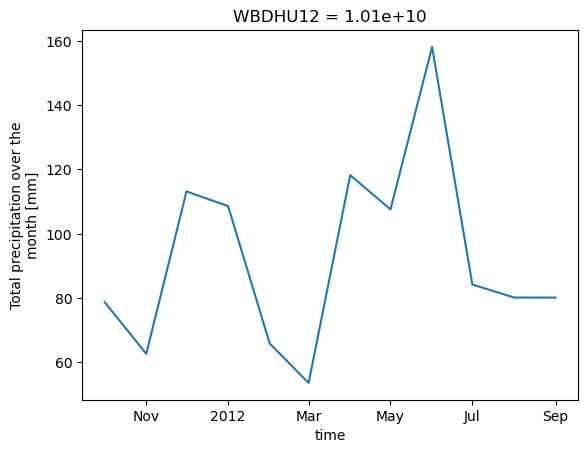

In [10]:
#ds_out.sel({zone_name:vals_1D_only[0]})['totStreamflow'].plot()
ds_out.sel({zone_name:vals_2D_only[0]})['totPRECIP'].plot()

In [11]:
%%time
print('  Writing output to {0}'.format(out_file))
ds_out.to_netcdf(out_file, mode='w', format="NETCDF4", compute=True)

  Writing output to /caldera/hovenweep/projects/usgs/water/impd/hytest/working/niwaa_wrfhydro_monthly_huc12_aggregations/merge_out/CONUS_HUC12_WB_combined_19791001_20220930.nc


<timed exec>:2: SerializationWarning: saving variable WBDHU12 with floating point data as an integer dtype without any _FillValue to use for NaNs


CPU times: user 364 ms, sys: 523 ms, total: 887 ms
Wall time: 1.09 s


In [12]:
ds_out.close()

In [13]:
print('Process completed in {0: 3.2f} seconds.'.format(time.time()-tic))

Process completed in  25.29 seconds.
